In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds_hmeq = pd.read_csv("실습파일/HMEQ.csv", engine="python")
ds_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
ds_hmeq["JOB"].fillna("Other", inplace = True)
ds_hmeq.fillna(ds_hmeq.mean(), inplace =True)

In [4]:
ds_hmeq_dummy = pd.get_dummies(ds_hmeq)
ds_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [5]:
np.random.seed(seed =1234)

In [6]:
from sklearn.model_selection import train_test_split


ds_hmeq_y = ds_hmeq["BAD"]
ds_hmeq_x = ds_hmeq_dummy.drop("BAD", axis = 1, inplace = False)

ds_hmeq_train_x, ds_hmeq_test_x, ds_hmeq_train_y, ds_hmeq_test_y =\
train_test_split(ds_hmeq_x, ds_hmeq_y, test_size=0.30, random_state = 1234)

In [7]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
knn_uncustomized.fit(ds_hmeq_train_x, ds_hmeq_train_y)

y_pred = knn_uncustomized.predict(ds_hmeq_test_x)
print("predict test set: {}".format(y_pred.tolist()[:10]))
print("test set label: {}".format(ds_hmeq_test_y.tolist()[:10]))
print("accuracy: {0: .3f}".format(knn_uncustomized.score(ds_hmeq_test_x,ds_hmeq_test_y)))

predict test set: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
test set label: [0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
accuracy:  0.908


In [9]:
max_n_neighbors = 10
para_n_neighbors = [i+1 for i in range(max_n_neighbors)]
train_accuracy=[]
test_accuracy=[]

for n_neighbors in para_n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    train_accuracy.append(clf.score(ds_hmeq_train_x, ds_hmeq_train_y))
    test_accuracy.append(clf.score(ds_hmeq_test_x, ds_hmeq_test_y))
    
ds_neighbors = pd.DataFrame()
ds_neighbors["Neighbors"] = para_n_neighbors
ds_neighbors["TrainAccuracy"] = train_accuracy
ds_neighbors["TestAccuracy"] = test_accuracy
ds_neighbors

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000000,0.877333
1,2,0.928326,0.912000
2,3,0.929470,0.912889
3,4,0.916127,0.913778
4,5,0.916127,0.907556
5,6,0.913458,0.911111
6,7,0.913458,0.912000
7,8,0.910027,0.912000
8,9,0.910789,0.912889
9,10,0.908883,0.910222


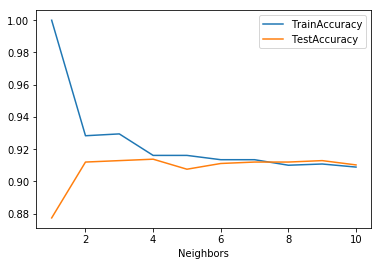

In [10]:
ds_neighbors.set_index("Neighbors",inplace = False).plot()

In [11]:
max_n_neighbors = 10
para_n_neighbors = [i+1 for i in range(max_n_neighbors)]*2
para_weights = ["uniform"]*max_n_neighbors + ["distance"]*max_n_neighbors
train_accuracy=[]
test_accuracy=[]

for (n_neighbors, weights) in zip(para_n_neighbors, para_weights):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    clf.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    train_accuracy.append(clf.score(ds_hmeq_train_x, ds_hmeq_train_y))
    test_accuracy.append(clf.score(ds_hmeq_test_x, ds_hmeq_test_y))
    
ds_neighbors_weight = pd.DataFrame()
ds_neighbors_weight["Neighbors"] = para_n_neighbors
ds_neighbors_weight["Weights"] = para_weights
ds_neighbors_weight["TrainAccuracy"] = train_accuracy
ds_neighbors_weight["TestAccuracy"] = test_accuracy
ds_neighbors_weight

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000000,0.877333
1,2,uniform,0.928326,0.912000
2,3,uniform,0.929470,0.912889
3,4,uniform,0.916127,0.913778
4,5,uniform,0.916127,0.907556
5,6,uniform,0.913458,0.911111
6,7,uniform,0.913458,0.912000
7,8,uniform,0.910027,0.912000
8,9,uniform,0.910789,0.912889
9,10,uniform,0.908883,0.910222


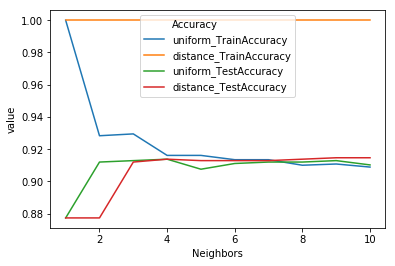

In [12]:
ds_neighbors_weight_melt = pd.melt(ds_neighbors_weight, id_vars=["Neighbors", "Weights"])

ds_neighbors_weight_melt["Accuracy"] = ds_neighbors_weight_melt["Weights"] + "_"+ ds_neighbors_weight_melt["variable"]

ax = sns.lineplot(x="Neighbors", y ="value",hue= "Accuracy", data=ds_neighbors_weight_melt)

In [13]:
max_n_neighbors = 10
para_n_neighbors = [i+1 for i in range(max_n_neighbors)]*3
para_algorithm = ["ball_tree"]*max_n_neighbors + ["kd_tree"]*max_n_neighbors + ["brute"]*max_n_neighbors
train_accuracy=[]
test_accuracy=[]

for (n_neighbors, algorithm) in zip(para_n_neighbors, para_algorithm):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform', algorithm=algorithm)
    clf.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    train_accuracy.append(clf.score(ds_hmeq_train_x, ds_hmeq_train_y))
    test_accuracy.append(clf.score(ds_hmeq_test_x, ds_hmeq_test_y))
    
ds_neighbors_algorithm = pd.DataFrame()
ds_neighbors_algorithm["Neighbors"] = para_n_neighbors
ds_neighbors_algorithm["Algorithm"] = para_algorithm
ds_neighbors_algorithm["TrainAccuracy"] = train_accuracy
ds_neighbors_algorithm["TestAccuracy"] = test_accuracy
ds_neighbors_algorithm

,Neighbors,Algorithm,TrainAccuracy,TestAccuracy
0,1,ball_tree,1.000000,0.877333
1,2,ball_tree,0.928326,0.912000
2,3,ball_tree,0.929470,0.912889
3,4,ball_tree,0.916127,0.913778
4,5,ball_tree,0.916127,0.907556
5,6,ball_tree,0.913458,0.911111
6,7,ball_tree,0.913458,0.912000
7,8,ball_tree,0.910027,0.912000
8,9,ball_tree,0.910789,0.912889
9,10,ball_tree,0.908883,0.910222


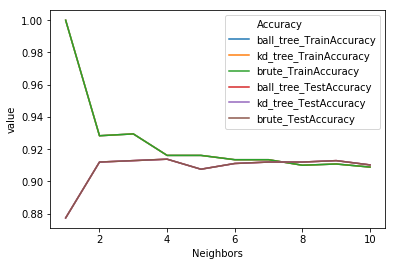

In [15]:
ds_neighbors_algorithm_melt = pd.melt(ds_neighbors_algorithm, id_vars=["Neighbors", "Algorithm"])

ds_neighbors_algorithm_melt["Accuracy"] = ds_neighbors_algorithm_melt["Algorithm"] + "_"+ ds_neighbors_algorithm_melt["variable"]

ax = sns.lineplot(x="Neighbors", y ="value",hue= "Accuracy", data=ds_neighbors_algorithm_melt)

In [18]:
max_n_neighbors = 10
para_n_neighbors = [i+1 for i in range(max_n_neighbors)]*3
para_metric = ["minkowski"]*max_n_neighbors + ["euclidean"]*max_n_neighbors + ["manhattan"]*max_n_neighbors
train_accuracy=[]
test_accuracy=[]

for (n_neighbors, metric) in zip(para_n_neighbors, para_metric):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform', algorithm="ball_tree", metric= metric)
    clf.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    train_accuracy.append(clf.score(ds_hmeq_train_x, ds_hmeq_train_y))
    test_accuracy.append(clf.score(ds_hmeq_test_x, ds_hmeq_test_y))
    
ds_neighbors_metric = pd.DataFrame()
ds_neighbors_metric["Neighbors"] = para_n_neighbors
ds_neighbors_metric["Metric"] = para_metric
ds_neighbors_metric["TrainAccuracy"] = train_accuracy
ds_neighbors_metric["TestAccuracy"] = test_accuracy
ds_neighbors_metric

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000000,0.877333
1,2,minkowski,0.928326,0.912000
2,3,minkowski,0.929470,0.912889
3,4,minkowski,0.916127,0.913778
4,5,minkowski,0.916127,0.907556
5,6,minkowski,0.913458,0.911111
6,7,minkowski,0.913458,0.912000
7,8,minkowski,0.910027,0.912000
8,9,minkowski,0.910789,0.912889
9,10,minkowski,0.908883,0.910222


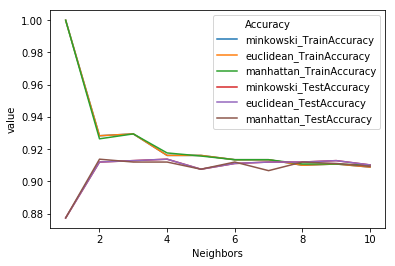

In [21]:
ds_neighbors_metric_melt = pd.melt(ds_neighbors_metric, id_vars=["Neighbors", "Metric"])

ds_neighbors_metric_melt["Accuracy"] = ds_neighbors_metric_melt["Metric"] + "_"+ ds_neighbors_metric_melt["variable"]

ax = sns.lineplot(x="Neighbors", y ="value",hue= "Accuracy", data=ds_neighbors_metric_melt)

In [22]:
clf_model = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='ball_tree', metric='euclidean')
clf_model.fit(ds_hmeq_train_x, ds_hmeq_train_y)
print("train data accuracy: {0: .3f}".format(clf_model.score(ds_hmeq_train_x,ds_hmeq_train_y)))
print("test data accuracy: {0: .3f}".format(clf_model.score(ds_hmeq_test_x,ds_hmeq_test_y)))

train data accuracy:  0.916
test data accuracy:  0.914
